# ARIMA Analytics on Google Stock Forecast

This notebook demonstrates how to perform ARIMA time series analysis on the `google-stock-forecast.csv` dataset. We will:

1. Load and explore the dataset
2. Visualize the time series
3. Fit an ARIMA model
4. Evaluate the model's performance

In [23]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np

## 1. Load the Dataset

Let's load the Google stock forecast data and inspect its structure.

In [24]:
# Load the dataset
df = pd.read_csv('google-stock-forecast.csv')
df.head()

,Date,Close
0,3/27/2014 16:00:00,27.85
1,3/28/2014 16:00:00,27.92
2,3/31/2014 16:00:00,27.77
3,4/1/2014 16:00:00,28.28
4,4/2/2014 16:00:00,28.27


In [25]:
# Check for missing values and data types
print(df.info())
print("IS NULL:", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2710 non-null   object 
 1   Close   2710 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.5+ KB
None
IS NULL: Date     0
Close    0
dtype: int64


## 2. Visualize the Time Series

Let's plot the time series to understand its trend and seasonality.

/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


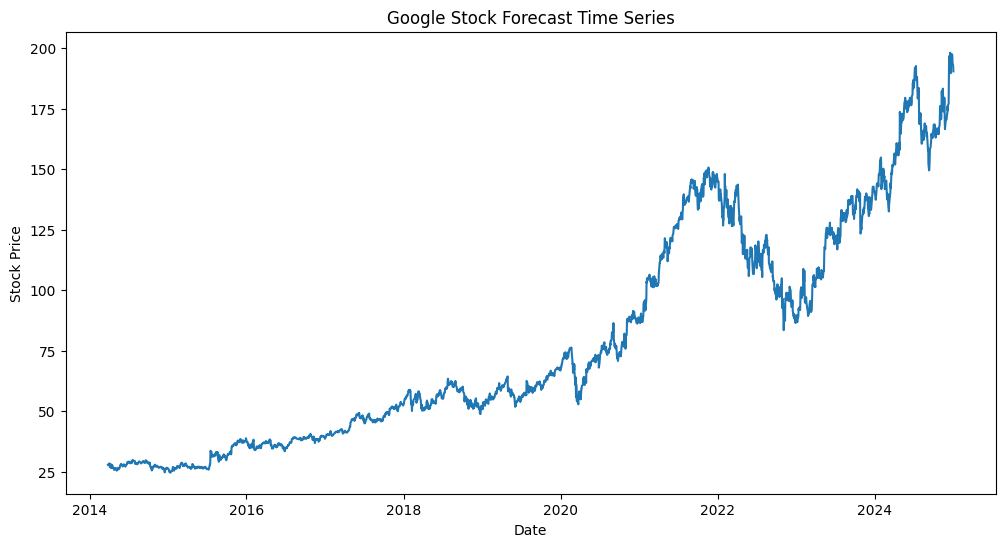

In [26]:
# Convert the date column to datetime if necessary
if not np.issubdtype(df.iloc[:,0].dtype, np.datetime64):
    df.iloc[:,0] = pd.to_datetime(df.iloc[:,0])

# Set the date as index
df.set_index(df.columns[0], inplace=True)

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(df)
plt.title('Google Stock Forecast Time Series')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

## 3. Fit an ARIMA Model

We will use the ARIMA model to forecast the stock prices. First, let's plot the ACF and PACF to help select the model parameters.

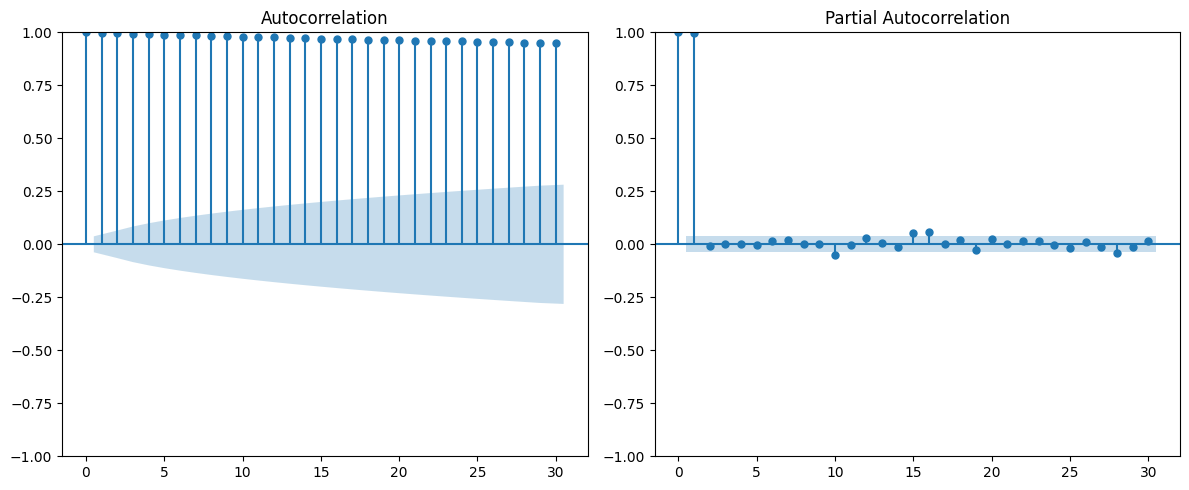

In [27]:
# Plot ACF and PACF
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(df.squeeze(), ax=plt.gca(), lags=30)
plt.subplot(1,2,2)
plot_pacf(df.squeeze(), ax=plt.gca(), lags=30, method='ywm')
plt.tight_layout()
plt.show()

In [28]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

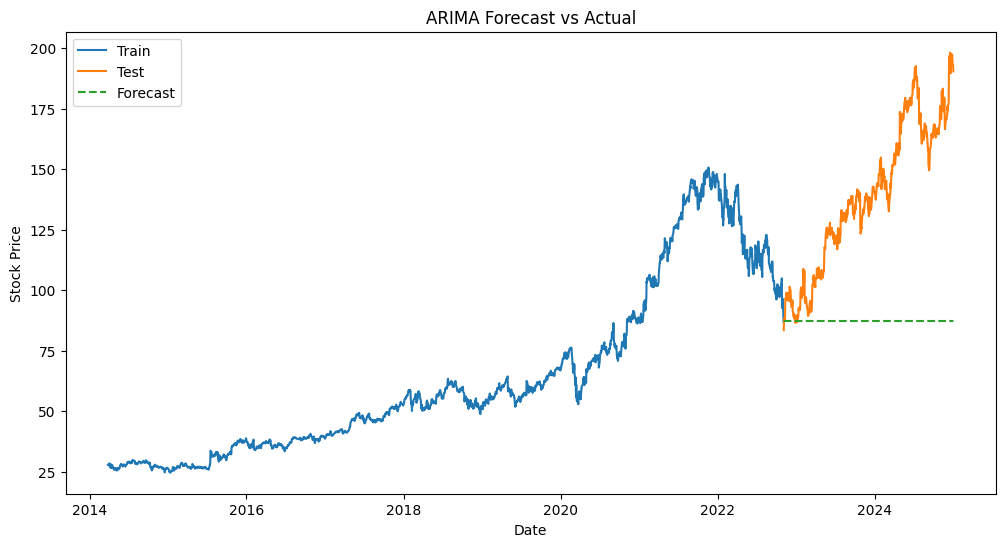

In [34]:
# Fit ARIMA model (example order, adjust as needed based on ACF/PACF)
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 4. Evaluate the Model

Let's evaluate the ARIMA model using Mean Squared Error (MSE).

In [35]:
# Calculate Mean Squared Error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 3549.85


## Conclusion

We have successfully performed ARIMA time series analysis on the Google stock forecast data, visualized the results, and evaluated the model's performance. You can further tune the ARIMA parameters for better accuracy.